In [182]:
import numpy as np
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper,BravyiKitaevMapper

In [183]:
n = 4
N = 2*n
t=1
mu=1.5
U=3

In [184]:
op = FermionicOp(
    {
        "+_0 -_0": 1.0,
        "+_1 -_1": -1.0,
    },
    num_spin_orbitals=2,
)

In [185]:
print(op)

Fermionic Operator
number spin orbitals=2, number terms=2
  1.0 * ( +_0 -_0 )
+ -1.0 * ( +_1 -_1 )


In [186]:
def qOp(i,j,N=8):
    return FermionicOp(
    {
        "+_{i} -_{j}".format(i=i%N,j=j%N): 1.0,
    },
    num_spin_orbitals=N,
)

In [190]:
t_term = 0
mu_term =0
U_term =0
for i in range(n):
    t_term+= qOp(2*i,2*i+2) + qOp(2*i+2,2*i) + qOp(2*i+1,2*i+3) + qOp(2*i+3,2*i+1) 
    mu_term += qOp(2*i,2*i) + qOp(2*i+1,2*i+1)
    U_term += (qOp(2*i,2*i) @ qOp(2*i+1, 2*i+1))
H = U * U_term - mu * mu_term - t * t_term

print(H)

Fermionic Operator
number spin orbitals=8, number terms=28
  3.0 * ( +_0 -_0 +_1 -_1 )
+ 3.0 * ( +_2 -_2 +_3 -_3 )
+ 3.0 * ( +_4 -_4 +_5 -_5 )
+ 3.0 * ( +_6 -_6 +_7 -_7 )
+ -1.5 * ( +_5 -_5 )
+ -1.5 * ( +_6 -_6 )
+ -1.5 * ( +_1 -_1 )
+ -1.5 * ( +_2 -_2 )
+ -1.5 * ( +_3 -_3 )
+ -1.5 * ( +_4 -_4 )
+ -1.5 * ( +_7 -_7 )
+ -1.5 * ( +_0 -_0 )
+ -1.0 * ( +_2 -_4 )
+ -1.0 * ( +_3 -_1 )
+ -1.0 * ( +_4 -_2 )
+ -1.0 * ( +_1 -_7 )
+ -1.0 * ( +_7 -_1 )
+ -1.0 * ( +_0 -_2 )
+ -1.0 * ( +_1 -_3 )
+ -1.0 * ( +_0 -_6 )
+ -1.0 * ( +_7 -_5 )
+ -1.0 * ( +_5 -_7 )
+ -1.0 * ( +_3 -_5 )
+ -1.0 * ( +_6 -_0 )
+ -1.0 * ( +_2 -_0 )
+ -1.0 * ( +_5 -_3 )
+ -1.0 * ( +_6 -_4 )
+ -1.0 * ( +_4 -_6 )


In [191]:
mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(H)
print(qubit_jw_op)

SparsePauliOp(['IIIIIIII', 'IIIIIIZZ', 'IIIIZZII', 'IIZZIIII', 'ZZIIIIII', 'IIIYZYII', 'IIIXZXII', 'IIIIXZXI', 'IIIIYZYI', 'YZZZZZYI', 'XZZZZZXI', 'IIIIIYZY', 'IIIIIXZX', 'IYZZZZZY', 'IXZZZZZX', 'XZXIIIII', 'YZYIIIII', 'IIYZYIII', 'IIXZXIII', 'IXZXIIII', 'IYZYIIII'],
              coeffs=[-3.  +0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j])


In [192]:
from qiskit.algorithms import NumPyEigensolver
from qiskit.visualization import plot_histogram
from qiskit.opflow.primitive_ops import PauliSumOp

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=3)
qubit_jw_op1 = PauliSumOp(qubit_jw_op)
exact_result = exact_solver.compute_eigenvalues(qubit_jw_op1)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 4)

/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_8341/1378709886.py:6: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=3)
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_8341/1378709886.py:7: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  qubit_jw_op1 = PauliSumOp(qubit_jw_op)


In [193]:
print(gs_energy)

-8.4244


In [207]:
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import SPSA, COBYLA

n = qubit_jw_op.num_qubits
est = Estimator()
ansatz = EfficientSU2(n)
optimizer = SPSA(maxiter = 500)
intermediate_info = []
params_info = []
def callback(eval_count,params,value,meta):
        intermediate_info.append(value)
        params_info.append(params)

vqe = VQE(est,ansatz,optimizer,callback = callback)


In [208]:
eigen = vqe.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue

In [209]:
print(eigen)

-7.028371798183836


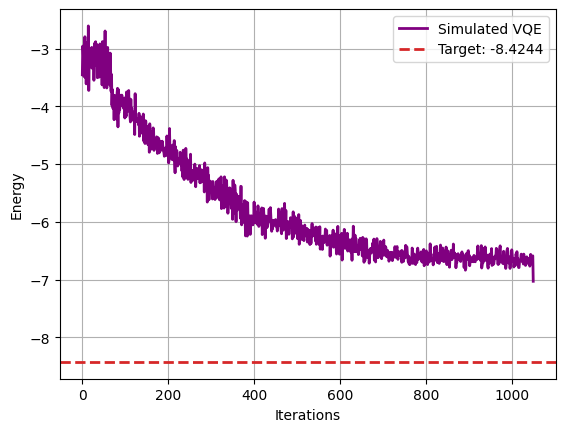

In [210]:
import matplotlib.pyplot as plt
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()